# An Introduction to Jupyter Notebooks

Jupyter Notebooks are a file format (```*.ipynb```) that you can execute and explain your code in a step-wise format.
> Jupyter Notebooks supports not only code execution in Python, but over 40 languages including R, Lua, Rust, and Julia with numerous [kernels](https://docs.jupyter.org/en/latest/projects/kernels.html#kernels-programming-languages).

We can write in Markdown to write text with some level of control over your formatting.
- [Here's a Link to Basic Markdown](https://www.markdownguide.org/basic-syntax/)
- [Here's a link to Markdown's Extended Syntax](https://www.markdownguide.org/extended-syntax/)

Topics We Will Cover
- Importing different files and filetypes with [```pandas```](https://pandas.pydata.org/docs/index.html)
- Basic Statistical Analysis of tabular data with ```pandas``` and ```numpy```
- Creating Charts with python packages from the [Matplotlib](https://matplotlib.org/), [Plotly](https://plotly.com/python/), or [HoloViz Ecosystem](https://holoviz.org/background.html#background-why-holoviz)
- Evaluate the potential usecases for each visualization package

![EvidenceOfLearning](../images/learning.gif)
<br>
*This is you, enjoying the learning process.*

Step 1: Import ```pandas``` into your python program.

In [1]:
import pandas as pd

# This will import the pandas and numpy packages into your Python program.

df_json = pd.read_json('../data/food-waste-pilot/food-waste-pilot.json')
df_csv = pd.read_csv('../data/food-waste-pilot/food-waste-pilot.csv')
df_xlsx = pd.read_excel('../data/food-waste-pilot/food-waste-pilot.xlsx')

In [2]:
df_csv.shape

(152, 3)

In [3]:
df_csv.head() # Grabs the top 5 items in your Dataframe by default.

,Collection Date,Food Waste Collected,Estimated Earned Compost Created
0,2022-02-25,250.8,25
1,2022-03-02,298.8,30
2,2022-03-21,601.2,60
3,2022-03-28,857.2,86
4,2022-03-30,610.8,61


In [4]:
df_csv.tail() # Grabs the bottom 5 items in your Dataframe by default.

,Collection Date,Food Waste Collected,Estimated Earned Compost Created
147,2022-10-12,385.8,39
148,2022-10-28,713.6,71
149,2022-10-31,953.4,95
150,2022-12-14,694.4,69
151,2023-01-06,968.6,97


In [5]:
df_csv.columns

Index(['Collection Date', 'Food Waste Collected',
       'Estimated Earned Compost Created'],
      dtype='object')

In [6]:
df_csv.dtypes # Returns the data types of your columns.

Collection Date                      object
Food Waste Collected                float64
Estimated Earned Compost Created      int64
dtype: object

In [7]:
df_csv.describe()

,Food Waste Collected,Estimated Earned Compost Created
count,152.000000,152.000000
mean,526.873684,52.611842
std,197.838075,19.787631
min,0.000000,0.000000
25%,398.050000,39.750000
50%,531.500000,53.000000
75%,658.900000,66.000000
max,1065.800000,107.000000


In [8]:
df_csv.info() # Returns index, column names, a count of Non-Null values, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Collection Date                   152 non-null    object 
 1   Food Waste Collected              152 non-null    float64
 2   Estimated Earned Compost Created  152 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


There are multiple methods to do type conversion using pandas as well.

In [9]:
# Oh no, we can see that our Collection Date is not the data type that we want, we need to convert it to a date value.

df_csv['Collection Date'] = pd.to_datetime(df_csv['Collection Date'])

In [10]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Collection Date                   152 non-null    datetime64[ns]
 1   Food Waste Collected              152 non-null    float64       
 2   Estimated Earned Compost Created  152 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.7 KB


In [11]:
# An alternative way to do this date conversion:

df_csv['Collection Date'] = df_csv['Collection Date'].apply(pd.to_datetime)

In [12]:
# astype() is more generic method to convert data types

df_csv['Collection Date'] = df_csv['Collection Date'].astype('datetime64[ns]')

In [13]:
df_csv.dtypes

Collection Date                     datetime64[ns]
Food Waste Collected                       float64
Estimated Earned Compost Created             int64
dtype: object

In [14]:
# Now that we have converted our Collection Date column to a datetime data type, we can use the dt.day_name() method to create a new column that contains the day of the week.

df_csv['Day of Week'] = df_csv['Collection Date'].dt.day_name()

In [15]:
# What if we want to know the date that we collected the most food waste?

df_csv.loc[
    df_csv['Food Waste Collected'].idxmax(),
    ['Collection Date']
]

Collection Date    2022-08-10 00:00:00
Name: 20, dtype: object

In [16]:
# If you wanted to see our top 10 collection dates, you could do this:

df_csv.nlargest(10,'Food Waste Collected')

,Collection Date,Food Waste Collected,Estimated Earned Compost Created,Day of Week
20,2022-08-10,1065.8,107,Wednesday
124,2022-12-27,987.4,99,Tuesday
48,2022-09-12,977.8,98,Monday
151,2023-01-06,968.6,97,Friday
149,2022-10-31,953.4,95,Monday
3,2022-03-28,857.2,86,Monday
123,2022-11-28,844.4,84,Monday
57,2022-12-05,834.4,83,Monday
91,2022-12-30,815.4,82,Friday
137,2022-07-18,807.8,81,Monday


In [17]:
df_csv.nsmallest(10,'Food Waste Collected')

,Collection Date,Food Waste Collected,Estimated Earned Compost Created,Day of Week
53,2022-11-11,0.0,0,Friday
95,2023-01-16,0.0,0,Monday
114,2022-09-05,0.0,0,Monday
97,2022-02-09,59.0,6,Wednesday
36,2022-02-16,102.8,10,Wednesday
63,2022-02-21,183.8,18,Monday
61,2022-02-11,197.0,20,Friday
39,2022-04-15,200.8,20,Friday
62,2022-02-18,202.8,20,Friday
29,2022-12-10,205.8,21,Saturday


<Axes: >

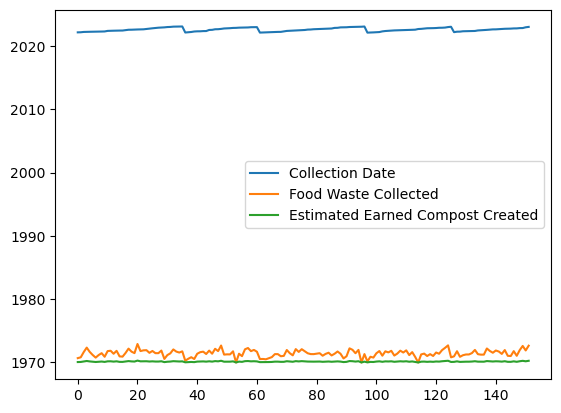

In [18]:
df_csv.plot()

## You have to make sure that `pandas` parses your dates

In [19]:
df_csv_parsed_dates = pd.read_csv('../data/food-waste-pilot/food-waste-pilot.csv', parse_dates=True, index_col="Collection Date")

<Axes: xlabel='Collection Date'>

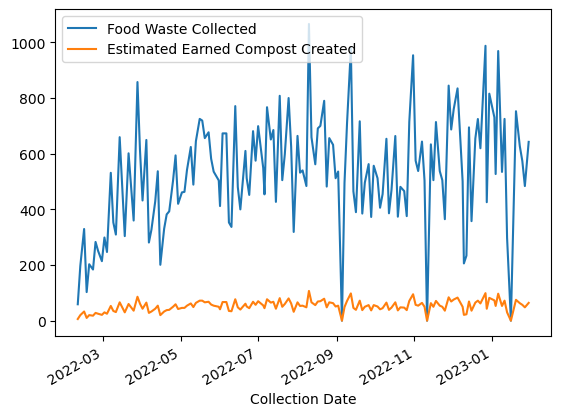

In [20]:
df_csv_parsed_dates.plot()